Surface Area ≈ 2.5173
Edge Length ≈ 12.6301


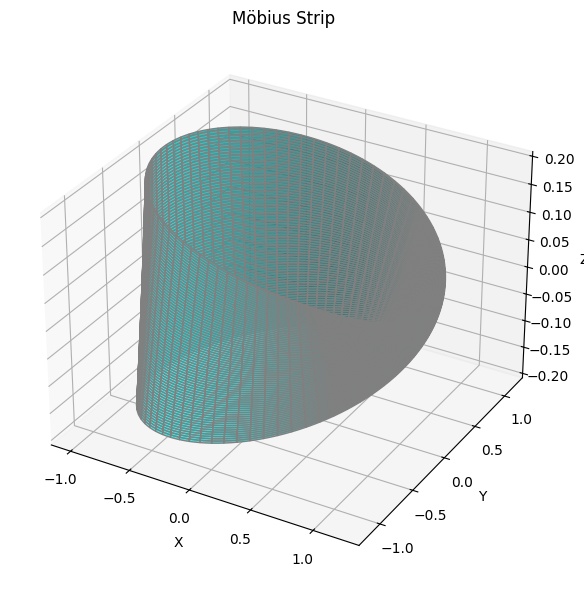

In [2]:
import numpy as np
from scipy.integrate import simpson
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.3, n=200):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w/2, w/2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.x, self.y, self.z = self._generate_surface()

    def _generate_surface(self):
        U, V = self.U, self.V
        x = (self.R + V * np.cos(U / 2)) * np.cos(U)
        y = (self.R + V * np.cos(U / 2)) * np.sin(U)
        z = V * np.sin(U / 2)
        return x, y, z

    def surface_area(self):
        du = self.u[1] - self.u[0]
        dv = self.v[1] - self.v[0]


        dx_du = np.gradient(self.x, axis=1) / du
        dy_du = np.gradient(self.y, axis=1) / du
        dz_du = np.gradient(self.z, axis=1) / du

        dx_dv = np.gradient(self.x, axis=0) / dv
        dy_dv = np.gradient(self.y, axis=0) / dv
        dz_dv = np.gradient(self.z, axis=0) / dv


        cross = np.sqrt(
            (dy_du * dz_dv - dz_du * dy_dv)**2 +
            (dz_du * dx_dv - dx_du * dz_dv)**2 +
            (dx_du * dy_dv - dy_du * dx_dv)**2
        )

        area = simpson(simpson(cross, self.v), self.u)

        return area

    def edge_length(self):

        edge1 = np.stack([self.x[0], self.y[0], self.z[0]], axis=1)
        edge2 = np.stack([self.x[-1], self.y[-1], self.z[-1]], axis=1)

        length1 = sum(euclidean(edge1[i], edge1[i + 1]) for i in range(self.n - 1))
        length2 = sum(euclidean(edge2[i], edge2[i + 1]) for i in range(self.n - 1))

        return length1 + length2

    def plot(self):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, rstride=4, cstride=4, color='cyan', edgecolor='gray', alpha=0.8)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=300)
    print(f"Surface Area ≈ {mobius.surface_area():.4f}")
    print(f"Edge Length ≈ {mobius.edge_length():.4f}")
    mobius.plot()
